### Table Of content

[Data Analysis](#Data_Analysis)


[Reason For churn](#Frequence_of_reason_for_churn)

[City wise churn](#City_wise_customer)

[Filling missing values](#Filling_missing_values)

[Churn VS Services](#Churn_VS_Services)

### Importing important Libaries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 

## Importing_data

In [61]:
Tele_comm_Df=pd.read_csv(r"F:\MLPacktPro\Customer-Churn-Prediction-main\Customer-Churn-Prediction-main\data\1\TelcoCustomerChurn.csv")

### Data_Analysis

In [62]:
Tele_comm_Df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


In [63]:
# Drop ID  & count as its not valuable to the model

Tele_comm_Df.drop(columns=["CustomerID"])
Tele_comm_Df.drop(columns=["Count"])

,CustomerID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,No,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,No,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,No,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,0829-DDVLK,United States,California,Orange,92866.0,"33.784597, -117.844535",33.784597,-117.844535,Female,No,...,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,0.0
4714,3230-JCNZS,United States,California,San Francisco,94107.0,"37.768881, -122.395521",37.768881,-122.395521,Female,No,...,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,0.0
4715,7384-GHBPI,United States,California,San Dimas,91773.0,"34.102119, -117.815532",34.102119,-117.815532,Male,No,...,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,1.0
4716,9254-RBFON,United States,California,Klamath River,96050.0,"41.816595, -122.948287",41.816595,-122.948287,Female,No,...,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,1.0


In [64]:
# View the data types

Tele_comm_Df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4687 non-null   object 
 1   Count              4691 non-null   float64
 2   Country            4708 non-null   object 
 3   State              4715 non-null   object 
 4   City               4688 non-null   object 
 5   Zip Code           4698 non-null   float64
 6   Lat Long           4713 non-null   object 
 7   Latitude           4695 non-null   float64
 8   Longitude          4685 non-null   float64
 9   Gender             4698 non-null   object 
 10  Senior Citizen     4711 non-null   object 
 11  Partner            4678 non-null   object 
 12  Dependents         4672 non-null   object 
 13  Tenure Months      4704 non-null   float64
 14  Phone Service      4692 non-null   object 
 15  Multiple Lines     4696 non-null   object 
 16  Internet Service   4692 

In [65]:
Tele_comm_Df["Total Charges"] = pd.to_numeric(Tele_comm_Df["Total Charges"], errors='coerce')

In [66]:
# Gather a list of the column names

Tele_comm_Df.columns.tolist()

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'Zip Code',
 'Lat Long',
 'Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'CLTV',
 'Churn Reason',
 'Churn Value']

In [67]:
# Print out all unique values for each variable
for col in Tele_comm_Df.columns:
    print(col, ":",Tele_comm_Df[col].unique())

CustomerID : ['5196-WPYOW' '8189-HBVRW' '4091-TVOCN' ... '7384-GHBPI' '9254-RBFON'
 '0022-TCJCI']
Count : [ 1. nan]
Country : ['United States' nan]
State : ['California' nan]
City : ['Paso Robles' 'Los Angeles' 'Potrero' ... 'Long Barn' 'Mount Hermon'
 'Gerber']
Zip Code : [93446. 90005. 91963. ... 95041. 96035. 94403.]
Lat Long : ['35.634222, -120.728341' '34.059281, -118.30742' '32.619465, -116.593605'
 ... '37.051166, -122.056194' '40.03194, -122.176023'
 '37.538309, -122.305109']
Latitude : [35.634222 34.059281 32.619465 ... 37.051166 40.03194  37.538309]
Longitude : [-120.728341 -118.30742  -116.593605 ... -122.056194 -122.176023
 -122.305109]
Gender : ['Male' 'Female' nan]
Senior Citizen : ['No' 'Yes' nan]
Partner : ['Yes' 'No' nan]
Dependents : ['Yes' 'No' nan]
Tenure Months : [67. 53. 48.  1. 57. 10. 33. 59. 28. 54. 29. 43. 62. 51.  9. 71. 65. 44.
 19. 39. 72. 40. 63.  3. 61. 25. 23. 11. 12.  5.  4. 35.  2.  7. 22. 26.
 37. 58. 36. 34. 15. 13. 18. 55. 46.  6. 21. 70.  8. 16. 52

In [82]:
Tele_comm_Df.drop(columns=["CustomerID","Count","Latitude","Longitude"],axis=1,inplace=True)

#### Frequence_of_reason_for_churn

In [83]:
Tele_comm_Df["Churn Reason"].value_counts()

Attitude of support person                   128
Competitor offered higher download speeds    118
Competitor offered more data                 110
Don't know                                   104
Competitor made better offer                 102
Attitude of service provider                  90
Competitor had better devices                 87
Price too high                                71
Product dissatisfaction                       70
Network reliability                           65
Lack of self-service on Website               59
Service dissatisfaction                       59
Extra data charges                            40
Moved                                         36
Lack of affordable download/upload speed      34
Limited range of services                     31
Long distance charges                         27
Poor expertise of online support              15
Poor expertise of phone support               12
Deceased                                       3
Name: Churn Reason, 

#####  Based of above analysis we can say that bad customer support,  getting better offer from competitor comparatively high price are measure reason for churn/

Text(0.5, 1.0, '# of Customers by Contract Type')

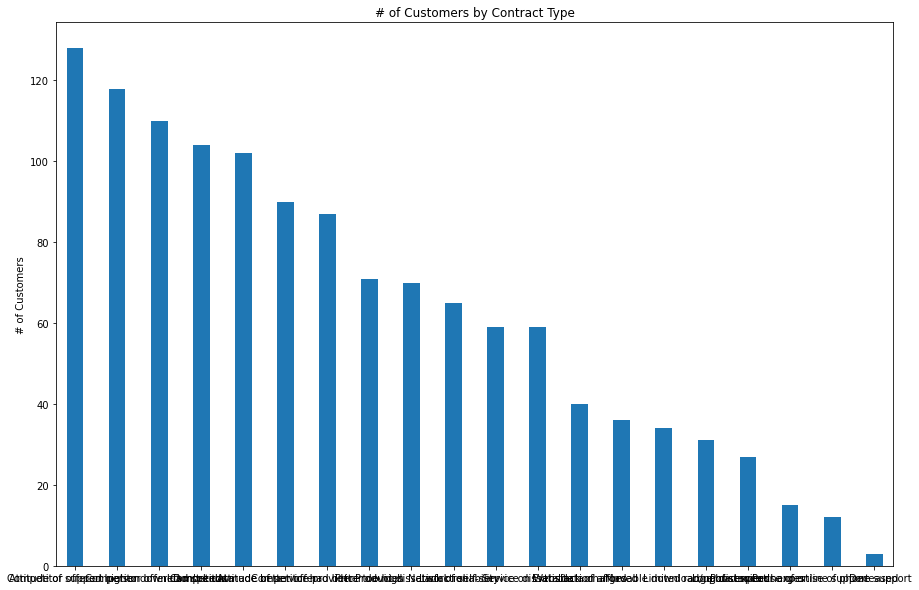

In [69]:
# Bar Plot for reason of churn


ax =Tele_comm_Df['Churn Reason'].value_counts().plot(kind = 'bar',rot = 0, width = 0.4, figsize=(15,10))
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')


#### City_wise_customer

In [84]:
Tele_comm_Df["City"].value_counts()

Los Angeles      214
San Diego         85
San Francisco     73
Sacramento        67
San Jose          62
                ... 
Doyle              1
Nubieber           1
El Cerrito         1
Cambria            1
Gerber             1
Name: City, Length: 1117, dtype: int64

##### Service is present im 1117 different city

In [85]:
Tele_comm_Df["City"].value_counts().head(65)

Los Angeles      214
San Diego         85
San Francisco     73
Sacramento        67
San Jose          62
                ... 
Moreno Valley      9
Santa Clara        9
Downey             9
Sherman Oaks       8
Hemet              8
Name: City, Length: 65, dtype: int64

In [72]:
Tele_comm_Df["City"].value_counts().head(770).sum()

4082

In [73]:
Tele_comm_Df["City"].value_counts().head(550).sum()

3422

####  50 % city covers 70 % of customers
####  70% of cities cover 82 % of customers.
#### That means most of the revenue is coming from 70 % of the cities only.

In [74]:
Tele_comm_Df["City"].value_counts().unique()

array([184,  85,  73,  67,  62,  40,  38,  33,  28,  27,  21,  20,  19,
        18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,
         5,   4,   3,   2,   1], dtype=int64)

In [75]:
Tele_comm_Df.drop(columns=["Country","State"],axis=1,inplace=True)

In [76]:
Tele_comm_Df.head()

,CustomerID,Count,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,No,Yes,...,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,...,No,No,Month-to-month,No,Electronic check,90.80,4921.20,5249.0,NaN,0.0
2,4091-TVOCN,1.0,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,No,No,...,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


In [77]:
Tele_comm_Df.isna().sum()

CustomerID             31
Count                  27
City                   30
Zip Code               20
Lat Long                5
Latitude               23
Longitude              33
Gender                 20
Senior Citizen          7
Partner                40
Dependents             46
Tenure Months          14
Phone Service          26
Multiple Lines         22
Internet Service       26
Online Security        44
Online Backup           4
Device Protection       7
Tech Support           23
Streaming TV           32
Streaming Movies       30
Contract               46
Paperless Billing      24
Payment Method          1
Monthly Charges         4
Total Charges          23
CLTV                   26
Churn Reason         3457
Churn Value            25
dtype: int64

### Filling_missing_values

In [79]:
# Replacing with mean

replcae_mean=["Monthly Charges","Total Charges","CLTV","Tenure Months"]
for i in replcae_mean:
    Tele_comm_Df[i].fillna(value=Tele_comm_Df[i].mean(),inplace=True)

In [80]:
# Replacing missing values with mode

find_mode=['Lat Long','Gender','City','Zip Code',
 'Churn Value',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']
for j in find_mode:
    a=Tele_comm_Df[j].mode()
    for i in a:
        Tele_comm_Df[j].fillna(value=i,inplace=True)
        
      
                                                                              


In [86]:
Tele_comm_Df.isna().sum()  

City                    0
Zip Code                0
Lat Long                0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
CLTV                    0
Churn Reason         3457
Churn Value             0
dtype: int64

In [24]:
target = Tele_comm_Df["Churn Value"] 

<AxesSubplot:>

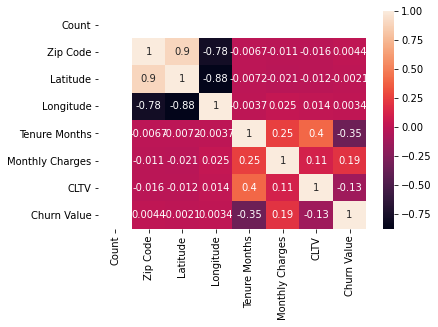

In [25]:
corrdata = pd.concat([Tele_comm_Df.drop(columns=["Churn Value"],axis=1),target],axis=1)
corr = corrdata.corr()
sns.heatmap(corr, annot=True)

#### Churn_VS_Services

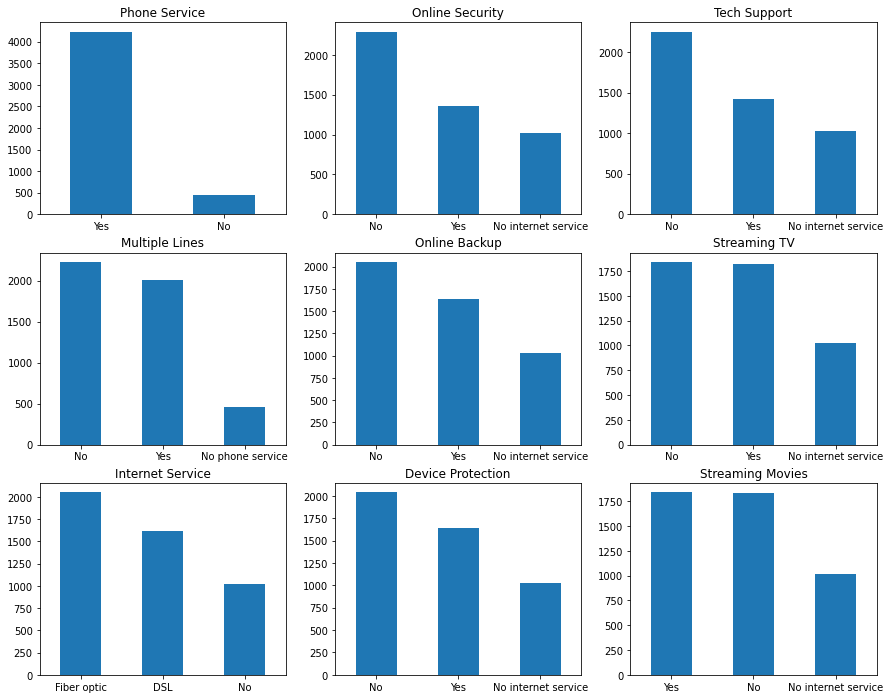

In [26]:
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = Tele_comm_Df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = Tele_comm_Df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = Tele_comm_Df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

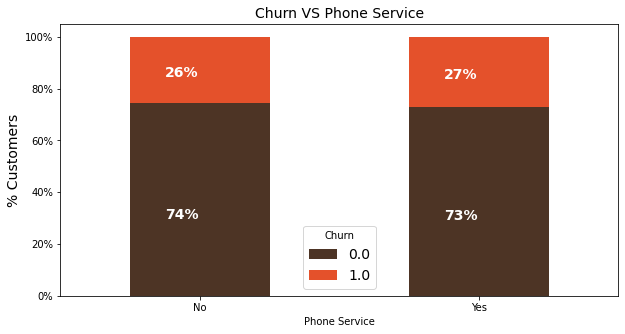

In [27]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Phone Service','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Phone Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

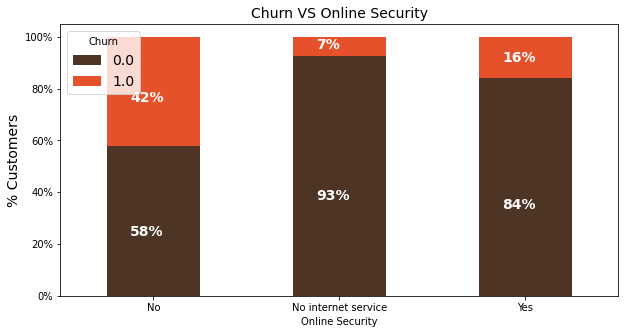

In [28]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Online Security','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Online Security',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### Churn rate is highest for customer without online security

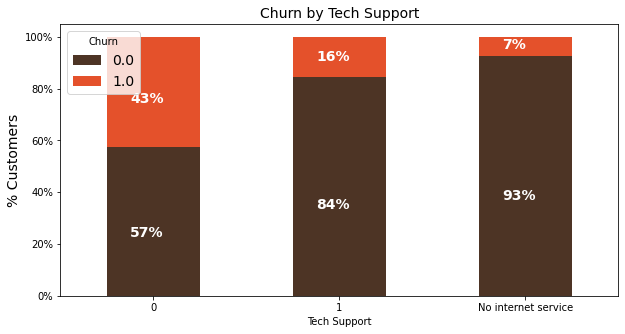

In [172]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Tech Support','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Tech Support',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### Churn rate is highest for customer without tech support

#### Total Value for online security and tech support and churn ratio is same for type of service in equal in both the column that means those who have taken online security also got tech support as well so we can delete any of the column out of two. Since online security has more missing value so will delete that column.¶

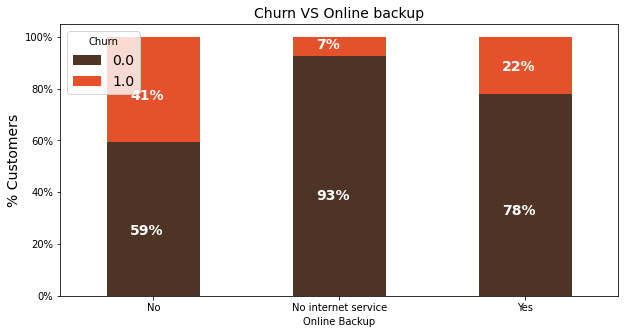

In [15]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Online Backup','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Online backup',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

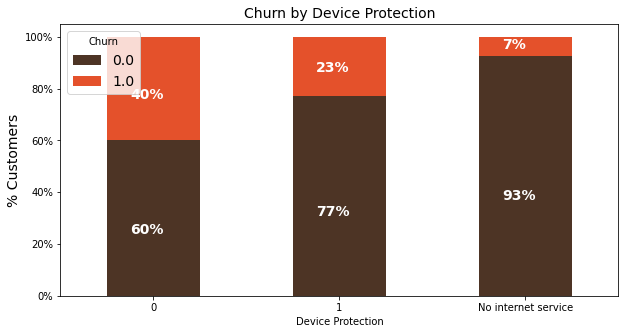

In [174]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Device Protection','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Device Protection',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

####  Total Value for online backup and device protection and churn ratio is for type of service in  equal in both the column that means those who have taken online backup also got device protection  as well so we can delete any of the column out of two. Since online backup  has more missing value so will delete that column.¶

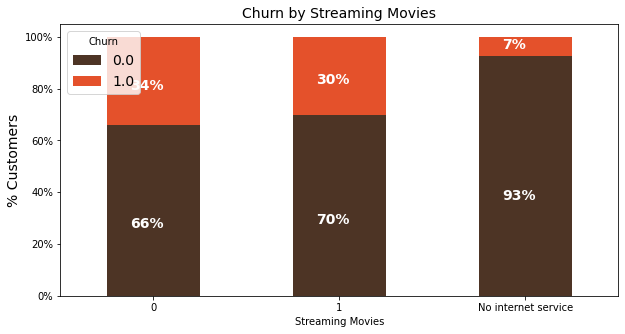

In [175]:
colors = ['#4D3425','#E4512B'] 
city_churn =Tele_comm_Df.groupby(['Streaming Movies','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Streaming Movies',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

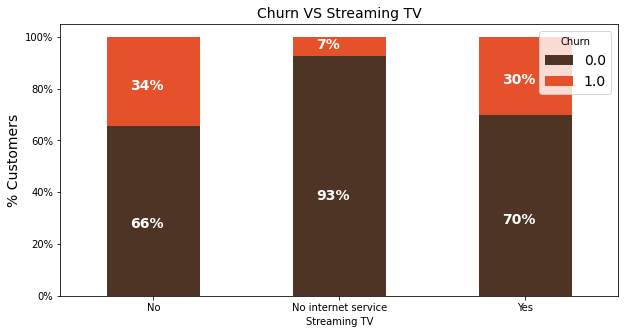

In [16]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Streaming TV','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Streaming TV',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14) 

#### Total Value for streaming movies and streaming and churn value is equal that means those who have taken streaming movies also got streaming Tv as well so we can delete any of the column out of two. Since streaming TV have more missing value so will delete that column.

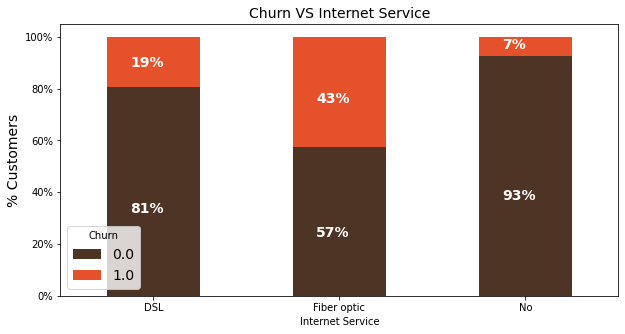

In [17]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Internet Service','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',
                                                      width = 0.5,
                                                      stacked = True,
                                                      rot = 0, 
                                                      figsize = (10,5),
                                                      color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Internet Service',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### Churn rate is  highest for fiber optic internal service

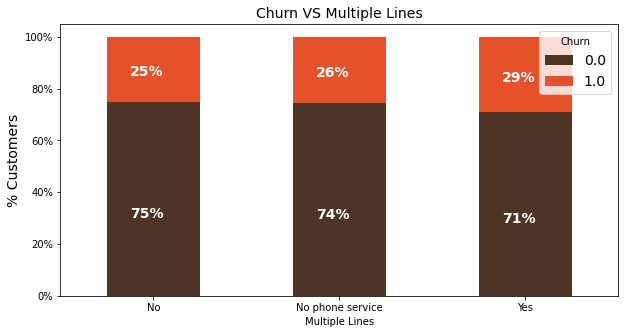

In [18]:
colors = ['#4D3425','#E4512B']
city_churn =Tele_comm_Df.groupby(['Multiple Lines','Churn Value']).size().unstack()

ax = (city_churn.T*100.0 / city_churn.T.sum()).T.plot(kind='bar',width = 0.5,stacked = True,rot = 0, figsize = (10,5),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Multiple Lines',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### Churn rate is almost same for all type of lines 

Text(0.5, 1.0, '# of Customers VS Contract Type')

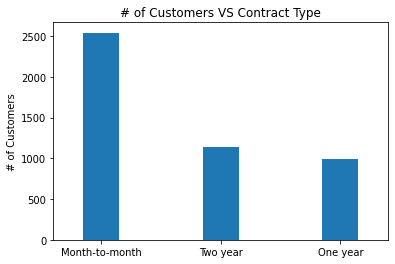

In [19]:
ax =Tele_comm_Df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers VS Contract Type')

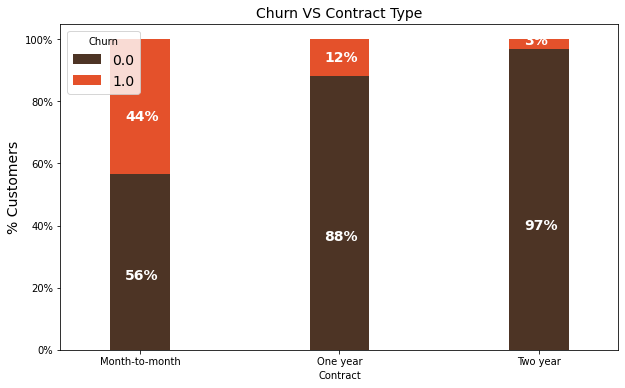

In [20]:
colors = ['#4D3425','#E4512B']
contract_churn =Tele_comm_Df.groupby(['Contract','Churn Value']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn VS Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### Most of the customer prefer monthly plan and churn rate is  highest for monthly plan

Text(0.5, 1.0, '# of Customers VS Seniority Level')

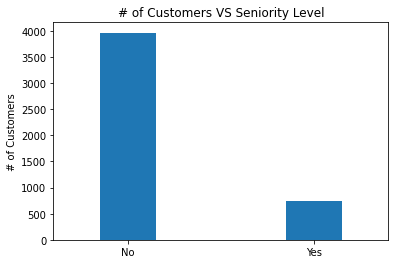

In [21]:
ax =Tele_comm_Df['Senior Citizen'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers VS Seniority Level') 

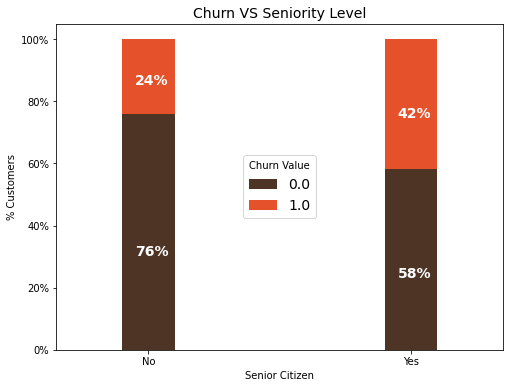

In [22]:
colors = ['#4D3425','#E4512B']
seniority_churn = Tele_comm_Df.groupby(['Senior Citizen','Churn Value']).size().unstack()
ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn Value')
ax.set_ylabel('% Customers')
ax.set_title('Churn VS Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

#### Churn rate for senior citizen is comparatively high